In [1]:
import pandas as pd

In [2]:
crime=pd.read_csv('Crimes.csv',index_col='Date') # import Date as index
crime.head(2)

C:\Users\sohel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2001 11:00:00 AM,11034701,JA366925,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/08/2017 03:00:00 AM,11227287,JB147188,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Primary Analysis of the data

In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6996721 entries, 01/01/2001 11:00:00 AM to 11/30/2017 09:00:00 AM
Data columns (total 29 columns):
ID                            int64
Case Number                   object
Block                         object
IUCR                          object
Primary Type                  object
Description                   object
Location Description          object
Arrest                        bool
Domestic                      bool
Beat                          int64
District                      float64
Ward                          float64
Community Area                float64
FBI Code                      object
X Coordinate                  float64
Y Coordinate                  float64
Year                          int64
Updated On                    object
Latitude                      float64
Longitude                     float64
Location                      object
Historical Wards 2003-2015    float64
Zip Codes                     float64
Com

# Let's look at the missing data

In [4]:
crime.isnull().sum()

ID                                 0
Case Number                        4
Block                              0
IUCR                               0
Primary Type                       0
Description                        0
Location Description            5742
Arrest                             0
Domestic                           0
Beat                               0
District                          47
Ward                          614825
Community Area                613495
FBI Code                           0
X Coordinate                   66684
Y Coordinate                   66684
Year                               0
Updated On                         0
Latitude                       66684
Longitude                      66684
Location                       66684
Historical Wards 2003-2015     86810
Zip Codes                      66684
Community Areas                84053
Census Tracts                  81896
Wards                          83940
Boundaries - ZIP Codes         84006
P

# From the above table we can see that we a lot's of missing data for the varibles Location Description,Community area etc.

# Let's do a bar plot to see the missing data

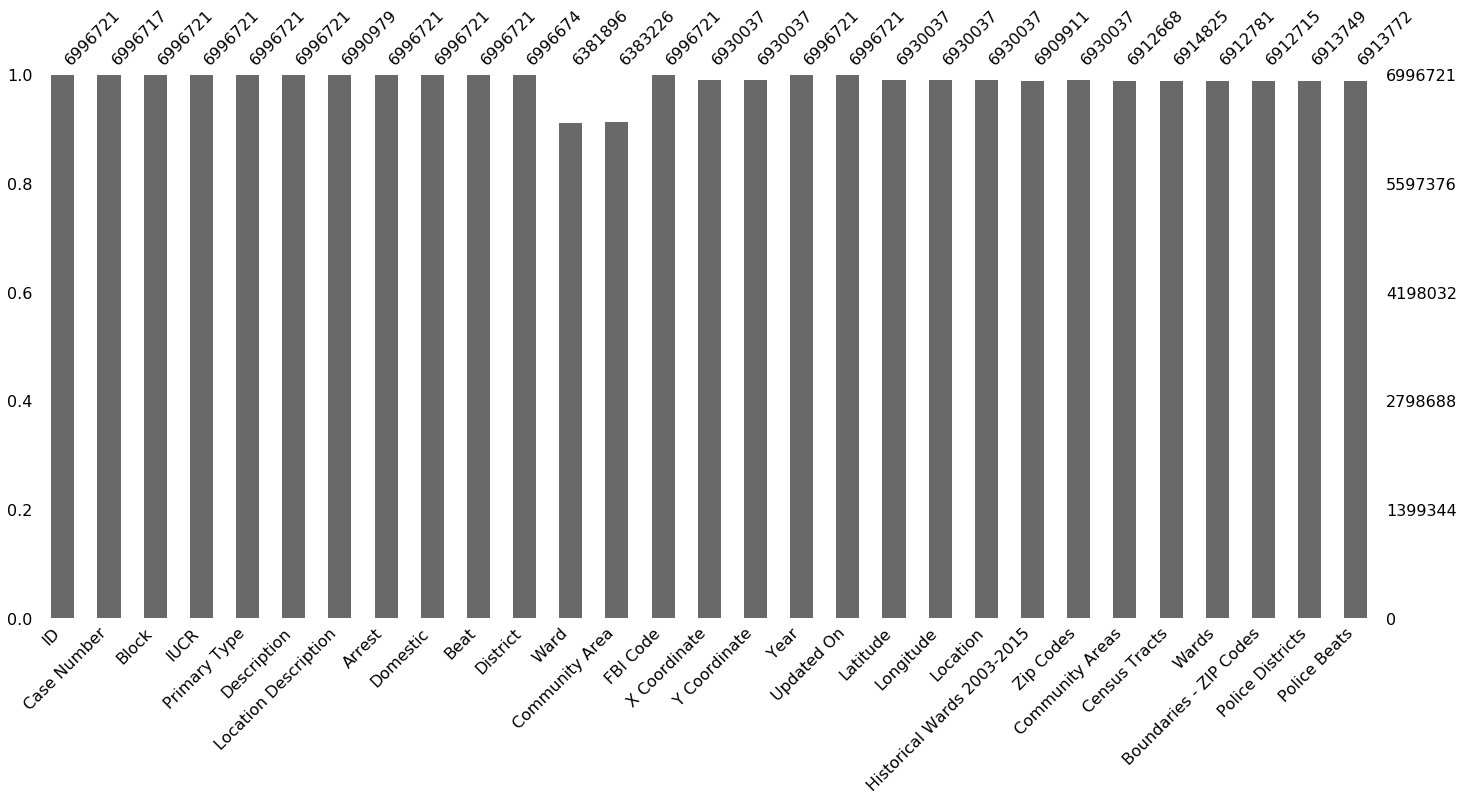

In [6]:
import pandas as pd 
import missingno as msno 
msno.bar(crime)

# From the above bar chart it's clear that we have maximum missing value for the variables 'Ward' and 'Community Area'

In [3]:
crime1=crime.iloc[:,4:]
crime1.sample(5)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
Date,,,,,,,,,,,,,,,,,,,,,
07/28/2004 03:30:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,633,6.0,6.0,44.0,05,...,-87.606433,"(41.731152454, -87.60643254)",31.0,21546.0,40.0,430.0,35.0,61.0,20.0,248.0
03/10/2010 01:00:00 PM,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,1223,12.0,25.0,31.0,06,...,-87.668785,"(41.85775341, -87.668784595)",8.0,14920.0,33.0,343.0,26.0,43.0,15.0,121.0
11/25/2008 11:00:00 AM,BATTERY,SIMPLE,STREET,False,False,815,8.0,23.0,57.0,08B,...,-87.729397,"(41.800773991, -87.729396946)",35.0,22248.0,54.0,637.0,8.0,56.0,13.0,105.0
05/27/2009 08:54:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,513,5.0,34.0,49.0,18,...,-87.623152,"(41.694285511, -87.623152439)",30.0,21861.0,45.0,237.0,43.0,19.0,10.0,260.0
12/15/2009 06:58:00 PM,CRIMINAL TRESPASS,TO LAND,OTHER,True,False,723,7.0,16.0,68.0,26,...,-87.647509,"(41.779704696, -87.647508582)",19.0,21559.0,66.0,436.0,2.0,11.0,17.0,202.0


# Let's change the 'Date variable' to_datetime

In [4]:
crime1.index=pd.to_datetime(crime1.index)
crime1.sample(5)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-22 08:00:00,THEFT,$500 AND UNDER,STREET,False,False,2112,1.0,2.0,33.0,06,...,-87.620541,"(41.847046931, -87.620540557)",48.0,21194.0,34.0,193.0,10.0,40.0,22.0,163.0
2019-06-05 21:20:00,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,825,8.0,16.0,66.0,18,...,-87.685328,"(41.779232682, -87.685328135)",44.0,21867.0,64.0,319.0,2.0,58.0,13.0,274.0
2014-07-17 10:41:00,NARCOTICS,POSS: HEROIN(WHITE),APARTMENT,True,False,311,3.0,20.0,40.0,18,...,-87.615650,"(41.781184105, -87.615649806)",53.0,22260.0,7.0,404.0,4.0,60.0,18.0,251.0
2008-12-31 20:15:00,THEFT,$500 AND UNDER,RESIDENCE,False,True,1624,16.0,45.0,15.0,06,...,-87.748224,"(41.957974271, -87.748224279)",20.0,22618.0,15.0,259.0,50.0,21.0,12.0,15.0
2003-05-17 20:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2515,25.0,37.0,19.0,07,...,-87.758510,"(41.920880436, -87.758509976)",4.0,22615.0,19.0,307.0,44.0,2.0,6.0,133.0


In [9]:
print(crime1.shape)
print(crime1.head())

(6996721, 25)
                            Primary Type                          Description  \
Date                                                                            
2001-01-01 11:00:00   DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
2017-10-08 03:00:00  CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   
2017-03-28 14:00:00             BURGLARY                       UNLAWFUL ENTRY   
2017-09-09 20:17:00                THEFT                            OVER $500   
2017-08-26 10:00:00  CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   

                    Location Description  Arrest  Domestic  Beat  District  \
Date                                                                         
2001-01-01 11:00:00            RESIDENCE   False     False   412       4.0   
2017-10-08 03:00:00            RESIDENCE   False     False  2222      22.0   
2017-03-28 14:00:00                OTHER   False     False   835       8.0   
2017-09-09 20:17:00         

# Let's see different types of crimes

In [11]:
primary_type = crime1[['Primary Type']]
print(primary_type.sample(5))
arrest_type = crime1[['Arrest']]
print(arrest_type.sample(5))

                            Primary Type
Date                                    
2007-02-01 10:00:00        OTHER OFFENSE
2011-10-04 07:55:00              ASSAULT
2003-06-23 20:30:00  MOTOR VEHICLE THEFT
2014-02-14 12:00:00             BURGLARY
2015-05-06 21:32:00              BATTERY
                     Arrest
Date                       
2001-12-27 13:16:56    True
2012-03-18 10:30:00   False
2005-04-17 15:30:00   False
2008-05-17 14:50:00   False
2014-07-12 14:40:00    True


In [12]:
crime_count = pd.DataFrame(primary_type.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())
print(crime_count.sample(5))
print(crime_count.shape)

            Primary Type   counts
9                ROBBERY   263289
15   CRIM SEXUAL ASSAULT    28855
1                BATTERY  1279119
0                  THEFT  1477391
19  LIQUOR LAW VIOLATION    14279
(35, 2)


# Let's do a bar plot to see if there's any specific crime type that occured most frequently

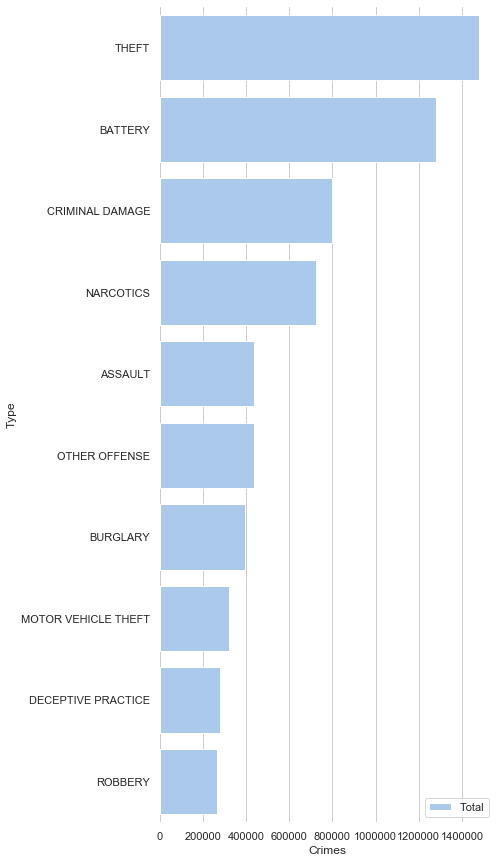

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="counts", y="Primary Type", data=crime_count.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

# The above figure shows that maximum crime occured in the field of 'Theft' which is interesting!

# Let's see total number of arrested and not arrest pople

In [15]:
crime_count_arrest = pd.DataFrame(arrest_type.groupby('Arrest').size().sort_values(ascending=False).rename('counts').reset_index())
print(crime_count_arrest)
print(crime_count_arrest.shape)

   Arrest   counts
0   False  5071722
1    True  1924999
(2, 2)


# It seems that 'Not Arrested' people are more than doubled of the arrested people. Only 27.5 % of the total count are arrested. That indicates that our data set is imbalanced data set, if we consider "Arrest" as our target variable.

# The data is big. Let's split the data for different years

In [5]:
crimes_2012 = crime1.loc['2012']
crimes_2013 = crime1.loc['2013']
crimes_2014 = crime1.loc['2014']
crimes_2015 = crime1.loc['2015']
crimes_2016 = crime1.loc['2016']
crimes_2017 = crime1.loc['2017']
crimes_2018 = crime1.loc['2018']
crimes_2019 = crime1.loc['2019']

## Yearly crimes
arrest_yearly = crime1[crime1['Arrest'] == True]['Arrest']
print(arrest_yearly.head())
print(crimes_2019.shape)
print(crimes_2018.shape)
print(crimes_2017.shape)
print(crimes_2016.shape)

Date
2011-01-01 00:01:00    True
2014-09-01 08:00:00    True
2017-08-24 15:18:00    True
2018-07-01 11:59:00    True
2014-07-16 10:50:00    True
Name: Arrest, dtype: bool
(209974, 25)
(267563, 25)
(268383, 25)
(269210, 25)


# Save the data as csv

In [6]:
crimes_2012.to_csv('crimes_2012.csv')
crimes_2013.to_csv('crimes_2013.csv')
crimes_2014.to_csv('crimes_2014.csv')
crimes_2015.to_csv('crimes_2015.csv')
crimes_2016.to_csv('crimes_2016.csv')
crimes_2017.to_csv('crimes_2017.csv')
crimes_2018.to_csv('crimes_2018.csv')
crimes_2019.to_csv('crimes_2019.csv')

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,2018-02-04 15:25:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1113,11.0,28.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-20 16:21:00,THEFT,$500 AND UNDER,RESIDENCE PORCH/HALLWAY,False,False,1935,19.0,43.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-05 00:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,2433,24.0,48.0,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-03 15:45:00,THEFT,OVER $500,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,False,False,1651,16.0,41.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-11-26 01:00:00,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,DEPARTMENT STORE,False,False,133,1.0,2.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# let's look at the trend of Arrest count of the whole data

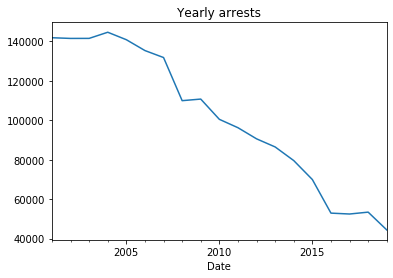

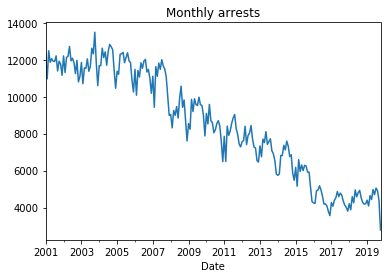

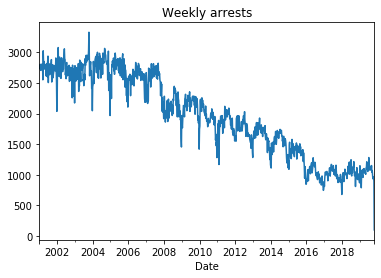

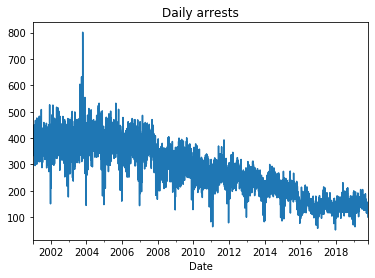

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot()
# yearly arrest
arrest_yearly.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()
# Monthly arrest
arrest_yearly.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()
# Weekly arrest
arrest_yearly.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()
# daily arrest
arrest_yearly.resample('D').sum().plot()
plt.title('Daily arrests')
plt.show()
plt.show()

# If we looked at the avove plots we can see that the number of arrested people are decreassing yearly
# There is sometime in each year where the arrest count is high and at some point it's lowest
# We also looked at the weekly arrest, and daily arrest counts


# Yearly Domestic violence

In [23]:
domestic_yearly = crime1[crime1['Domestic'] == True]['Domestic']
print(domestic_yearly.head())

Date
2015-01-01 00:01:00    True
2017-11-22 02:42:00    True
2015-05-30 00:00:00    True
2015-05-30 00:00:00    True
2001-07-12 00:01:00    True
Name: Domestic, dtype: bool


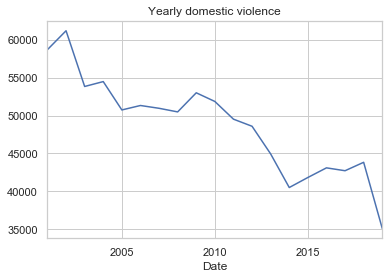

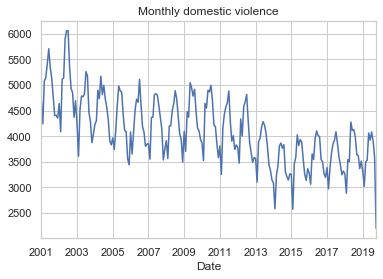

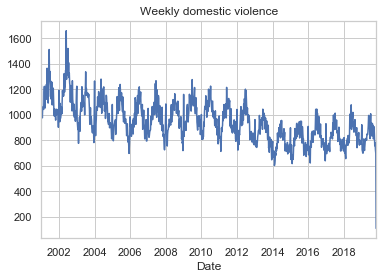

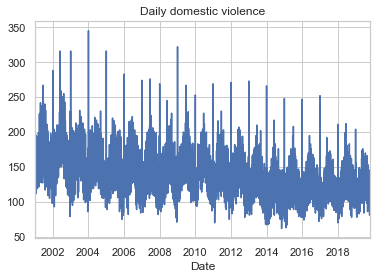

In [24]:
# yearly domestic violence
domestic_yearly.resample('A').sum().plot()
plt.title('Yearly domestic violence')
plt.show()
# Monthly domestic violence
domestic_yearly.resample('M').sum().plot()
plt.title('Monthly domestic violence')
plt.show()
# Weekly domestic violence
domestic_yearly.resample('W').sum().plot()
plt.title('Weekly domestic violence')
plt.show()
# daily domestic violence
domestic_yearly.resample('D').sum().plot()
plt.title('Daily domestic violence')
plt.show()
plt.show()

# It's clear from the plot that the Domestic Violence is also have a specific patter both in yearly and monthly cases.

# As our data set is really big so we used only the 2018 data set for further analysis

In [11]:
crimes_2018=pd.read_csv('crimes_2018.csv')
#crimes_2019=pd.read_csv('crimes_2019.csv')
crimes_2018.head(5)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,2018-02-04 15:25:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1113,11.0,28.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-20 16:21:00,THEFT,$500 AND UNDER,RESIDENCE PORCH/HALLWAY,False,False,1935,19.0,43.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-05 00:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,2433,24.0,48.0,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-03 15:45:00,THEFT,OVER $500,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,False,False,1651,16.0,41.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-11-26 01:00:00,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,DEPARTMENT STORE,False,False,133,1.0,2.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
crimes_2018.isnull().sum()

Date                             0
Primary Type                     0
Description                      0
Location Description           911
Arrest                           0
Domestic                         0
Beat                             0
District                         0
Ward                             4
Community Area                   2
FBI Code                         0
X Coordinate                  4136
Y Coordinate                  4136
Year                             0
Updated On                       0
Latitude                      4136
Longitude                     4136
Location                      4136
Historical Wards 2003-2015    5015
Zip Codes                     4136
Community Areas               4905
Census Tracts                 4735
Wards                         4903
Boundaries - ZIP Codes        4902
Police Districts              4865
Police Beats                  4865
dtype: int64

# There is null values!

# As most of the variables are categorical we used mode to fill the null values

# fill the null values by mode

In [13]:
crimes_2018_mode = crimes_2018.apply(lambda x: x.fillna(x.mode()[0]))
crimes_2018_mode.sample(5)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
41738,2018-03-03 09:42:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,724,7.0,17.0,68.0,...,-87.653073,"(41.771504897, -87.653072772)",17.0,21559.0,66.0,410.0,2.0,11.0,17.0,203.0
131300,2018-07-03 13:00:00,ASSAULT,SIMPLE,RESIDENCE,False,True,523,5.0,34.0,53.0,...,-87.634540,"(41.673303516, -87.634539749)",45.0,21861.0,50.0,60.0,22.0,19.0,10.0,218.0
264356,2018-12-29 18:00:00,ASSAULT,SIMPLE,APARTMENT,False,True,2515,25.0,36.0,19.0,...,-87.771959,"(41.920785067, -87.771959245)",4.0,22615.0,19.0,57.0,44.0,2.0,6.0,133.0
205855,2018-10-06 21:30:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,733,7.0,6.0,68.0,...,-87.649195,"(41.76242569, -87.649195416)",17.0,21559.0,66.0,512.0,32.0,11.0,17.0,215.0
171039,2018-07-28 11:00:00,THEFT,OVER $500,RESIDENCE,False,False,531,5.0,9.0,49.0,...,-87.613197,"(41.686747997, -87.613196689)",30.0,21861.0,45.0,253.0,43.0,19.0,10.0,265.0


In [14]:
print(crimes_2018_mode.isnull().sum()) # Checking if all the missing data are filled out

Date                          0
Primary Type                  0
Description                   0
Location Description          0
Arrest                        0
Domestic                      0
Beat                          0
District                      0
Ward                          0
Community Area                0
FBI Code                      0
X Coordinate                  0
Y Coordinate                  0
Year                          0
Updated On                    0
Latitude                      0
Longitude                     0
Location                      0
Historical Wards 2003-2015    0
Zip Codes                     0
Community Areas               0
Census Tracts                 0
Wards                         0
Boundaries - ZIP Codes        0
Police Districts              0
Police Beats                  0
dtype: int64


In [58]:
#crimes_2018_mode.to_csv('crimes_2018_mode.csv')


In [15]:
crimes_2018_mode.shape

(267563, 26)

# For our project we have decided to use the 'Arrest' as our target variables and other variables as predictor variables. Our goal is to predict the odds of Arrest based on the other explanatory variables. As we have 25 explanatory variables we used different methods to select the most important features.

In [ ]:
# Let's work on feature selection for 2018 data

In [27]:
#import pandas as pd

In [16]:
df=crimes_2018_mode

In [28]:
#df=pd.read_csv('crimes_2018_mode.csv')

In [17]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,2018-02-04 15:25:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,1113,11.0,28.0,26.0,...,-87.627877,"(41.883500187, -87.627876698)",22.0,21572.0,26.0,92.0,36.0,59.0,16.0,74.0
1,2018-02-20 16:21:00,THEFT,$500 AND UNDER,RESIDENCE PORCH/HALLWAY,False,False,1935,19.0,43.0,7.0,...,-87.627877,"(41.883500187, -87.627876698)",22.0,21572.0,26.0,92.0,36.0,59.0,16.0,74.0
2,2018-02-05 00:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,2433,24.0,48.0,77.0,...,-87.627877,"(41.883500187, -87.627876698)",22.0,21572.0,26.0,92.0,36.0,59.0,16.0,74.0
3,2018-01-03 15:45:00,THEFT,OVER $500,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,False,False,1651,16.0,41.0,76.0,...,-87.627877,"(41.883500187, -87.627876698)",22.0,21572.0,26.0,92.0,36.0,59.0,16.0,74.0
4,2018-11-26 01:00:00,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,DEPARTMENT STORE,False,False,133,1.0,2.0,35.0,...,-87.627877,"(41.883500187, -87.627876698)",22.0,21572.0,26.0,92.0,36.0,59.0,16.0,74.0


# let's define feature and target variables

In [18]:
df_feature=df.drop(['Arrest','Date'],axis=1) # all the explanatory variables. Date is meaning less and that's why we dropped Date
df_target=df['Arrest'] # Our target variable

# Selecting feature based on Correlation. We know that if two explanatory variables are highly correlated then using one of them to explain target variable is okay as the two highly correlated varibles should bear almost same information

In [19]:
cor = df_feature.corr()

In [20]:
cor

,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
Domestic,1.000000,-0.053835,-0.053951,-0.088675,0.108881,0.008790,-0.121950,NaN,-0.121737,0.006924,-0.000347,0.044794,0.028704,0.016485,-0.039678,0.013587,0.048236,0.106981
Beat,-0.053835,1.000000,0.999693,0.644455,-0.481299,-0.528560,0.613471,NaN,0.614288,-0.523368,-0.065062,-0.078218,-0.102483,0.030329,0.073463,-0.314878,-0.662864,-0.369579
District,-0.053951,0.999693,1.000000,0.645827,-0.481862,-0.529618,0.614806,NaN,0.615625,-0.524413,-0.064400,-0.078348,-0.103148,0.030431,0.072713,-0.314272,-0.663208,-0.370051
Ward,-0.088675,0.644455,0.645827,1.000000,-0.528062,-0.416879,0.649952,NaN,0.650247,-0.410198,-0.029719,-0.151670,-0.117189,0.067703,0.068435,-0.175467,-0.466471,-0.543878
Community Area,0.108881,-0.481299,-0.481862,-0.528062,1.000000,0.227075,-0.764446,NaN,-0.763760,0.217228,0.060454,0.113194,0.664420,0.058007,-0.188925,0.189142,0.287859,0.607748
X Coordinate,0.008790,-0.528560,-0.529618,-0.416879,0.227075,1.000000,-0.526382,NaN,-0.529188,0.999914,0.091724,0.032821,0.157043,-0.088197,0.119233,0.121192,0.279046,0.380151
Y Coordinate,-0.121950,0.613471,0.614806,0.649952,-0.764446,-0.526382,1.000000,NaN,0.999995,-0.515223,-0.085101,-0.170823,-0.472107,-0.025546,0.038213,-0.204749,-0.376230,-0.783949
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,-0.121737,0.614288,0.615625,0.650247,-0.763760,-0.529188,0.999995,NaN,1.000000,-0.518051,-0.085313,-0.170601,-0.471726,-0.025164,0.037624,-0.204786,-0.376565,-0.783816
Longitude,0.006924,-0.523368,-0.524413,-0.410198,0.217228,0.999914,-0.515223,NaN,-0.518051,1.000000,0.091076,0.030327,0.151297,-0.089337,0.120436,0.119143,0.275619,0.371109


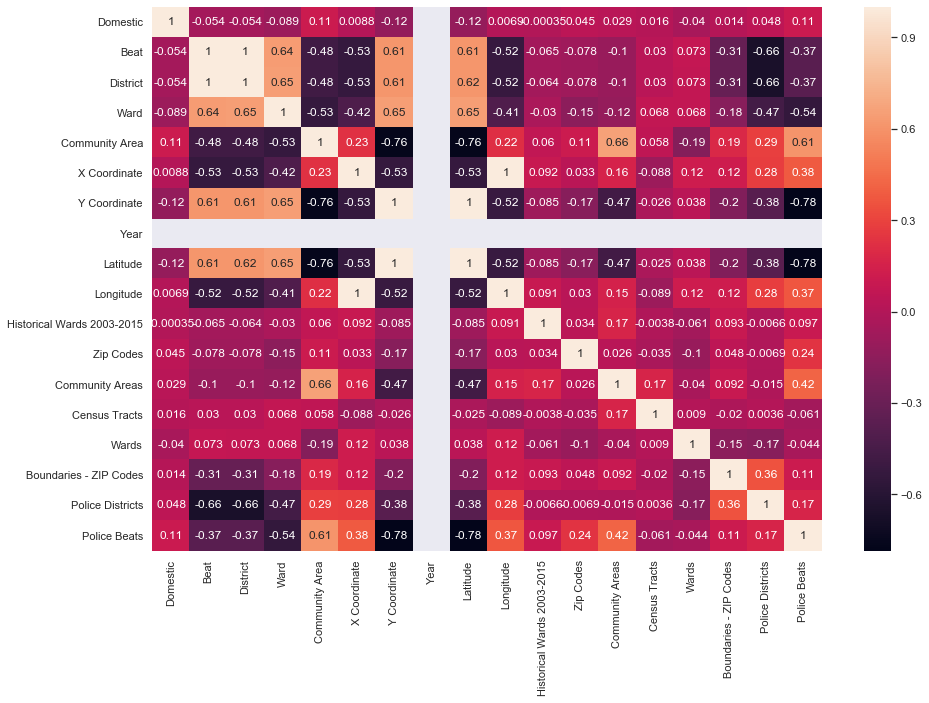

In [21]:
import seaborn as sns
sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(cor, annot = True)

In [22]:
import numpy as np
corr_abs_df_2018 = cor.corr().abs()
corr_sub_df_2018 = (corr_abs_df_2018.where(np.triu(np.ones(corr_abs_df_2018.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
#corr_sub_df_2018
print(corr_sub_df_2018.iloc[0:20:,]) #highest 8 correlation
#sns.barplot(y = corr_sub_df_2018.index, x = corr_sub_df_2018.values)  #simple bar plot

Beat            District            0.999999
Y Coordinate    Latitude            0.999999
X Coordinate    Longitude           0.999948
Y Coordinate    Police Beats        0.972521
Latitude        Police Beats        0.972378
Community Area  Y Coordinate        0.957395
                Latitude            0.957024
Ward            Latitude            0.947610
                Y Coordinate        0.947448
District        Ward                0.944406
Beat            Ward                0.944149
Community Area  Police Beats        0.934322
Beat            Police Districts    0.932328
District        Police Districts    0.932186
Ward            Police Beats        0.907150
District        Latitude            0.898666
Beat            Latitude            0.898312
District        Y Coordinate        0.898286
Beat            Y Coordinate        0.897933
Ward            Community Area      0.886565
dtype: float64


# We can see that there are lot's of highly correlated variables. So let's drop some variables. Let's drop District,Y Coordinate,X Coordinate,Latitude, Community Area,Ward [we considered correlation cutoff>0.9, that we droped one of the variables where the correlation is greater than 0.9]

In [23]:
df_feature=df_feature.drop(['District','Y Coordinate','X Coordinate','Latitude','Community Area','Ward'],axis=1) # our new features
df_feature.sample(4)

,Primary Type,Description,Location Description,Domestic,Beat,FBI Code,Year,Updated On,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
195603,ASSAULT,SIMPLE,BAR OR TAVERN,True,1431,08A,2018,09/29/2018 03:59:11 PM,-87.690695,"(41.924870519, -87.690695031)",24.0,22535.0,23.0,240.0,41.0,1.0,7.0,184.0
87596,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,1021,26,2018,05/15/2018 03:55:49 PM,-87.711579,"(41.860051247, -87.711578706)",36.0,21569.0,30.0,772.0,14.0,57.0,21.0,153.0
10664,ROBBERY,STRONGARM - NO WEAPON,STREET,False,1121,03,2018,05/04/2018 03:51:04 PM,-87.711485,"(41.896985583, -87.711485041)",41.0,4299.0,24.0,150.0,46.0,5.0,16.0,65.0
212245,NARCOTICS,POSS: COCAINE,ALLEY,False,813,18,2018,10/25/2018 04:10:05 PM,-87.731339,"(41.779793098, -87.73133904)",23.0,21867.0,63.0,292.0,6.0,58.0,13.0,271.0


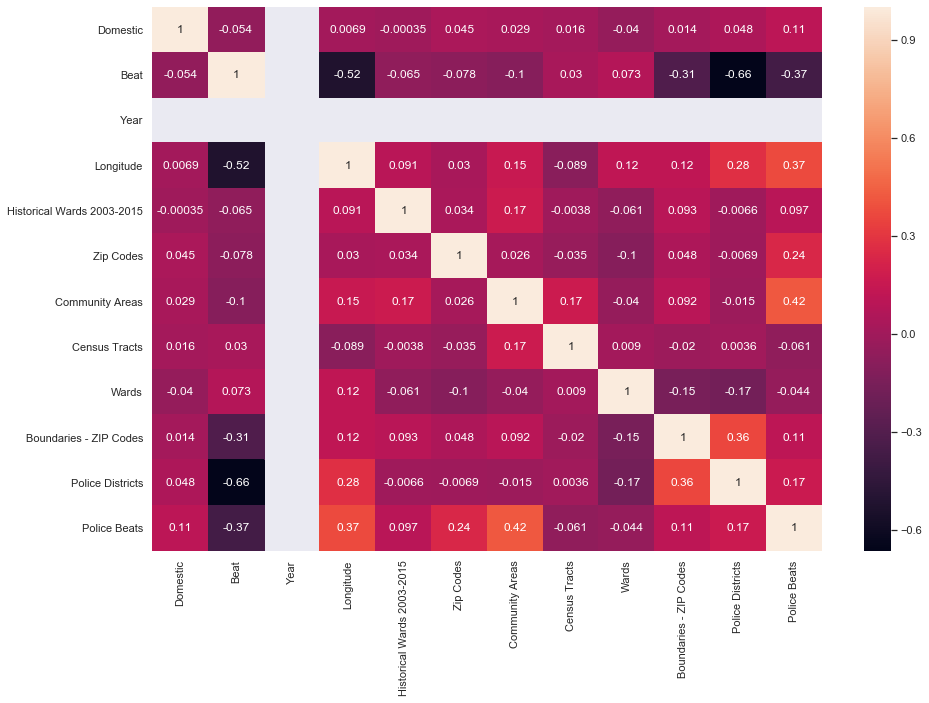

In [24]:
cor=df_feature.corr()
import seaborn as sns
sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(cor, annot = True)

In [26]:
df_feature.dtypes

Primary Type                   object
Description                    object
Location Description           object
Domestic                         bool
Beat                            int64
FBI Code                       object
Year                            int64
Updated On                     object
Longitude                     float64
Location                       object
Historical Wards 2003-2015    float64
Zip Codes                     float64
Community Areas               float64
Census Tracts                 float64
Wards                         float64
Boundaries - ZIP Codes        float64
Police Districts              float64
Police Beats                  float64
dtype: object

In [27]:
# #https://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers
# print(df_feature['Primary Type'].unique())
# print(df_feature['Description'].unique())
# print(df_feature['Location Description'].unique())
# print(df_feature['Domestic'].unique())
# print(df_feature['FBI Code'].unique())
# print(df_feature['Updated On'].unique())
# print(df_feature['Location'].unique())

# We have some object type variables. We will replace the category by number for our further analysis. We assigned the number of the alphabetic order of the category


In [28]:
#df_feature=df_feature.drop(['District','Y Coordinate','X Coordinate','Latitude','Community Area','Ward'],axis=1)
df_feature['Primary Type'] = pd.factorize(df_feature['Primary Type'],sort=True)[0]
df_feature['Description'] = pd.factorize(df_feature['Description'],sort=True)[0]
df_feature['Location Description'] = pd.factorize(df_feature['Location Description'],sort=True)[0]
df_feature['Domestic'] = pd.factorize(df_feature['Domestic'],sort=True)[0]
df_feature['FBI Code'] = pd.factorize(df_feature['FBI Code'],sort=True)[0]
df_feature['Updated On'] = pd.factorize(df_feature['Updated On'],sort=True)[0]
df_feature['Location'] = pd.factorize(df_feature['Location'],sort=True)[0]

In [29]:
df_feature.sample(4)

,Primary Type,Description,Location Description,Domestic,Beat,FBI Code,Year,Updated On,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
208427,6,266,17,1,324,16,2018,959,-87.589716,31124,32.0,21546.0,39.0,451.0,35.0,61.0,18.0,217.0
201528,1,33,15,0,1713,4,2018,922,-87.704885,117291,2.0,21849.0,14.0,749.0,20.0,20.0,1.0,1.0
170932,17,217,113,0,1122,20,2018,772,-87.721860,81724,41.0,21572.0,24.0,584.0,46.0,30.0,16.0,82.0
55294,6,266,17,0,1131,16,2018,315,-87.741251,71570,36.0,22216.0,26.0,69.0,14.0,32.0,16.0,143.0


In [50]:
#df_target=df['Arrest']
#df_target

# Let's recode the target variable

In [43]:
#df_target=df['Arrest']
df_target= pd.factorize(df['Arrest'],sort=True)[0]
print(df_target)

[0 0 0 ... 0 1 0]


# Now let's go for some more feature selection model

In [30]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For applying some other feature selection we first normalized our data set by MinMaxScaler

In [31]:
y=df_target

In [32]:
nor = MinMaxScaler()
X = nor.fit_transform(df_feature)
#X =df_feature
print(X)

[[0.25806452 0.39333333 0.89312977 ... 0.96666667 0.625      0.26449275]
 [0.96774194 0.         0.77862595 ... 0.96666667 0.625      0.26449275]
 [0.74193548 0.84666667 0.77099237 ... 0.96666667 0.625      0.26449275]
 ...
 [0.03225806 0.81666667 0.77862595 ... 0.96666667 0.625      0.26449275]
 [0.25806452 0.39333333 0.69465649 ... 0.96666667 0.625      0.26449275]
 [0.25806452 0.39333333 0.89312977 ... 0.96666667 0.625      0.26449275]]


# Extra Tree Classifier for selecting features. This method use the importance of each feature at explaining the target variables and then rank them bsed on the importance

In [33]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest

fi = []
Balanced_Acc = []
F1 = []
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for trainIndex, textIndex in skf.split(X, y):
    xTrain, xTest = X[trainIndex], X[textIndex]
    yTrain, yTest = y[trainIndex], y[textIndex]
    
    
    # fit an Extra Trees model to the data
    #model = ExtraTreesClassifier(n_estimators=20,n_jobs=4)
    #model = ExtraTreesClassifier(n_estimators=100) # by default n_estimator/tree is 10
    model = ExtraTreesClassifier(n_estimators=50)

    #model = ExtraTreesClassifier()
    model.fit(xTrain, yTrain)
    #model.fit(xTrain, yTrain,xTest,yTest)
    #exTreeModel=model.fit(xTrain, yTrain,xTest,yTest)
    #exTreeModelAcc=compute_accuracy(model,xTrain, yTrain,xTest,yTest)
    
    fi.append(model.feature_importances_)
    
    sfm = SelectFromModel(model, threshold=0.05) # considering the importance greater than 0.1
    sfm.fit(xTrain, yTrain)
    xTrain = sfm.transform(xTrain)
    xTest = sfm.transform(xTest)
        
    clf = LogisticRegression(solver="liblinear")
    clf.fit(xTrain, yTrain)
    yPred = clf.predict(xTest)
    Balanced_Acc.append(balanced_accuracy_score(yTest, yPred))
    F1.append(f1_score(yPred,yTest))

# display the relative importance of each attribute
importance=pd.Series(np.mean(fi,axis=0))
selected_features_importance=pd.DataFrame({'Feature' :list(df_feature.columns),'Importance' :importance})
print(selected_features_importance.sort_values(by='Importance'))
#print(pd.DataFrame(fi).mean(axis = 0))
print("Balanced Accuracy: ", np.mean(Balanced_Acc))
print("F1: ", np.mean(F1))

                       Feature  Importance
6                         Year    0.000000
16            Police Districts    0.013396
15      Boundaries - ZIP Codes    0.014813
11                   Zip Codes    0.015452
3                     Domestic    0.016557
12             Community Areas    0.017190
10  Historical Wards 2003-2015    0.018109
14                       Wards    0.019067
17                Police Beats    0.028925
4                         Beat    0.034032
13               Census Tracts    0.039415
2         Location Description    0.082326
8                    Longitude    0.084155
9                     Location    0.085611
7                   Updated On    0.106259
0                 Primary Type    0.122913
1                  Description    0.124436
5                     FBI Code    0.177345
Balanced Accuracy:  0.5222821070067214
F1:  0.1257095198434193


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(yPred, yTest))
print(f1_score(yPred,yTest))
print(confusion_matrix(yTest,yPred))


              precision    recall  f1-score   support

       False       0.97      0.81      0.88     51457
        True       0.07      0.38      0.12      2055

    accuracy                           0.79     53512
   macro avg       0.52      0.60      0.50     53512
weighted avg       0.94      0.79      0.85     53512

0.12345872928610697
[[41565  1269]
 [ 9892   786]]


In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

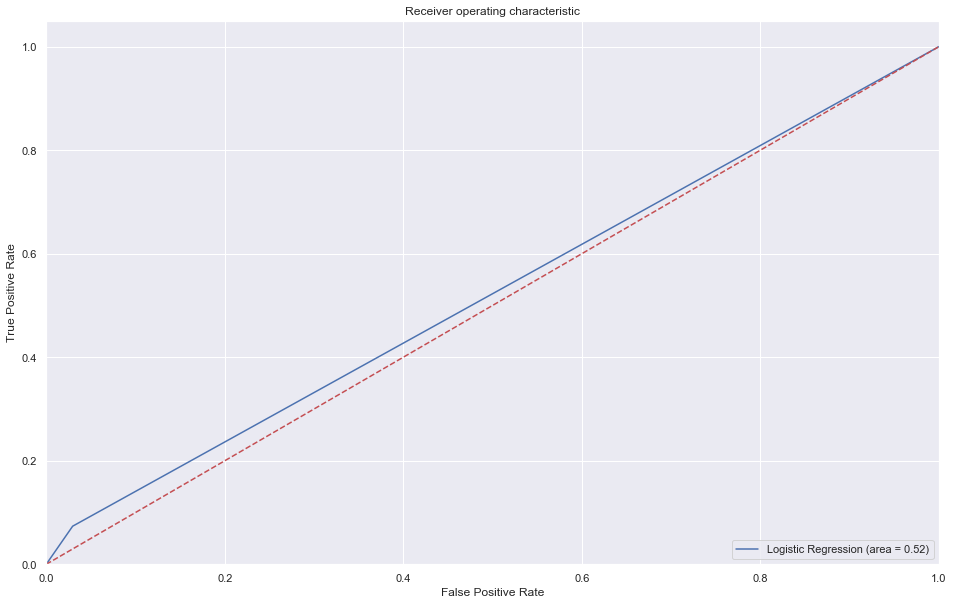

In [39]:
logit_roc_auc = roc_auc_score(yTest, yPred)
fpr, tpr, thresholds = roc_curve(yTest, yPred)
plt.figure(figsize=(16, 10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# At the threshold of 0.05, we have only 7 features that are important to explain our target variables  among them "FBI Code','Description','Primary Type','Updated On'. Based on that, the F1 score is very low which is only 0.12 although the overall accuracy of the model is 0.79. The are From ROC curve we can see that our AUC is 0.52

In [ ]:
# let's do little bit change in the model

In [40]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest

fi = []
Balanced_Acc = []
F1 = []
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for trainIndex, textIndex in skf.split(X, y):
    xTrain, xTest = X[trainIndex], X[textIndex]
    yTrain, yTest = y[trainIndex], y[textIndex]
    
    
    # fit an Extra Trees model to the data
    #model = ExtraTreesClassifier(n_estimators=20,n_jobs=4)
    #model = ExtraTreesClassifier(n_estimators=100) # by default n_estimator/tree is 10
    model = ExtraTreesClassifier(n_estimators=50)

    #model = ExtraTreesClassifier()
    model.fit(xTrain, yTrain)
    #model.fit(xTrain, yTrain,xTest,yTest)
    #exTreeModel=model.fit(xTrain, yTrain,xTest,yTest)
    #exTreeModelAcc=compute_accuracy(model,xTrain, yTrain,xTest,yTest)
    
    fi.append(model.feature_importances_)
    
    sfm = SelectFromModel(model, threshold=0.05) # considering the importance greater than 0.1
    sfm.fit(xTrain, yTrain)
    xTrain = sfm.transform(xTrain)
    xTest = sfm.transform(xTest)
        
    clf = LogisticRegression(class_weight='balanced',solver="liblinear")
    clf.fit(xTrain, yTrain)
    yPred = clf.predict(xTest)
    Balanced_Acc.append(balanced_accuracy_score(yTest, yPred))
    F1.append(f1_score(yPred,yTest))

# display the relative importance of each attribute
importance=pd.Series(np.mean(fi,axis=0))
selected_features_importance=pd.DataFrame({'Feature' :list(df_feature.columns),'Importance' :importance})
print(selected_features_importance.sort_values(by='Importance'))
#print(pd.DataFrame(fi).mean(axis = 0))
print("Balanced Accuracy: ", np.mean(Balanced_Acc))
print("F1: ", np.mean(F1))

                       Feature  Importance
6                         Year    0.000000
16            Police Districts    0.013097
15      Boundaries - ZIP Codes    0.014466
11                   Zip Codes    0.015177
3                     Domestic    0.016434
12             Community Areas    0.017345
10  Historical Wards 2003-2015    0.017868
14                       Wards    0.018990
17                Police Beats    0.028621
4                         Beat    0.033440
13               Census Tracts    0.039463
2         Location Description    0.081648
8                    Longitude    0.084750
9                     Location    0.085754
7                   Updated On    0.106436
0                 Primary Type    0.121633
1                  Description    0.130717
5                     FBI Code    0.174161
Balanced Accuracy:  0.664238035639374
F1:  0.447838120457784


              precision    recall  f1-score   support

       False       0.76      0.87      0.81     37010
        True       0.56      0.37      0.44     16502

    accuracy                           0.72     53512
   macro avg       0.66      0.62      0.63     53512
weighted avg       0.70      0.72      0.70     53512

0.44370860927152317
[[32362 10472]
 [ 4648  6030]]


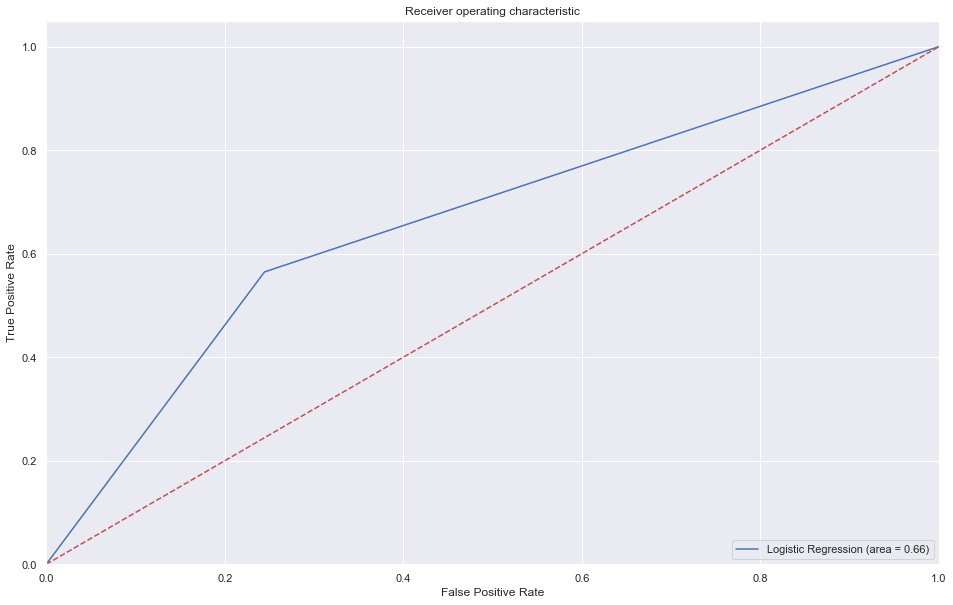

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(yPred, yTest))
print(f1_score(yPred,yTest))
print(confusion_matrix(yTest,yPred))
logit_roc_auc = roc_auc_score(yTest, yPred)
fpr, tpr, thresholds = roc_curve(yTest, yPred)
plt.figure(figsize=(16, 10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# We can see that the area under aoc curve improved to 0.66 and also improve in f1 score

# Let's go for random forest classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
fi = []
Balanced_Acc = []
F1 = []
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for trainIndex, textIndex in skf.split(X, y):
    xTrain, xTest = X[trainIndex], X[textIndex]
    yTrain, yTest = y[trainIndex], y[textIndex]
    
    
    # fit an Extra Trees model to the data
    #model = ExtraTreesClassifier(n_estimators=20,n_jobs=4)
    #model = ExtraTreesClassifier(n_estimators=100) # by default n_estimator/tree is 10
    model = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)

    #model = ExtraTreesClassifier()
    model.fit(xTrain, yTrain)
    #model.fit(xTrain, yTrain,xTest,yTest)
    #exTreeModel=model.fit(xTrain, yTrain,xTest,yTest)
    #exTreeModelAcc=compute_accuracy(model,xTrain, yTrain,xTest,yTest)
    
    fi.append(model.feature_importances_)
    
    sfm = SelectFromModel(model, threshold=0.05) # considering the importance greater than 0.1
    sfm.fit(xTrain, yTrain)
    xTrain = sfm.transform(xTrain)
    xTest = sfm.transform(xTest)
        
    clf = LogisticRegression(class_weight="balanced").fit(xTrain, yTrain) # I changed here
    clf.fit(xTrain, yTrain)
    yPred = clf.predict(xTest)
    Balanced_Acc.append(balanced_accuracy_score(yTest, yPred))
    F1.append(f1_score(yPred,yTest))

# display the relative importance of each attribute
importance=pd.Series(np.mean(fi,axis=0))
selected_features_importance=pd.DataFrame({'Feature' :list(df_feature.columns),'Importance' :importance})
print(selected_features_importance.sort_values(by='Importance'))
#print(pd.DataFrame(fi).mean(axis = 0))
print("Balanced Accuracy: ", np.mean(Balanced_Acc))
print("F1: ", np.mean(F1))

C:\Users\sohel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sohel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sohel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sohel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sohel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

                       Feature  Importance
6                         Year    0.000000
13               Census Tracts    0.000034
10  Historical Wards 2003-2015    0.000709
14                       Wards    0.001048
7                   Updated On    0.002156
15      Boundaries - ZIP Codes    0.002446
3                     Domestic    0.005139
11                   Zip Codes    0.005880
17                Police Beats    0.010592
12             Community Areas    0.010814
8                    Longitude    0.012312
4                         Beat    0.033761
9                     Location    0.041901
16            Police Districts    0.048832
2         Location Description    0.111577
0                 Primary Type    0.208241
5                     FBI Code    0.243787
1                  Description    0.260771
Balanced Accuracy:  0.6066605291650843
F1:  0.3963489703159244


              precision    recall  f1-score   support

       False       0.55      0.86      0.67     21213
        True       0.66      0.28      0.40     20781

    accuracy                           0.57     41994
   macro avg       0.61      0.57      0.53     41994
weighted avg       0.60      0.57      0.53     41994

0.3956295946583934
[[18206 14915]
 [ 3007  5866]]


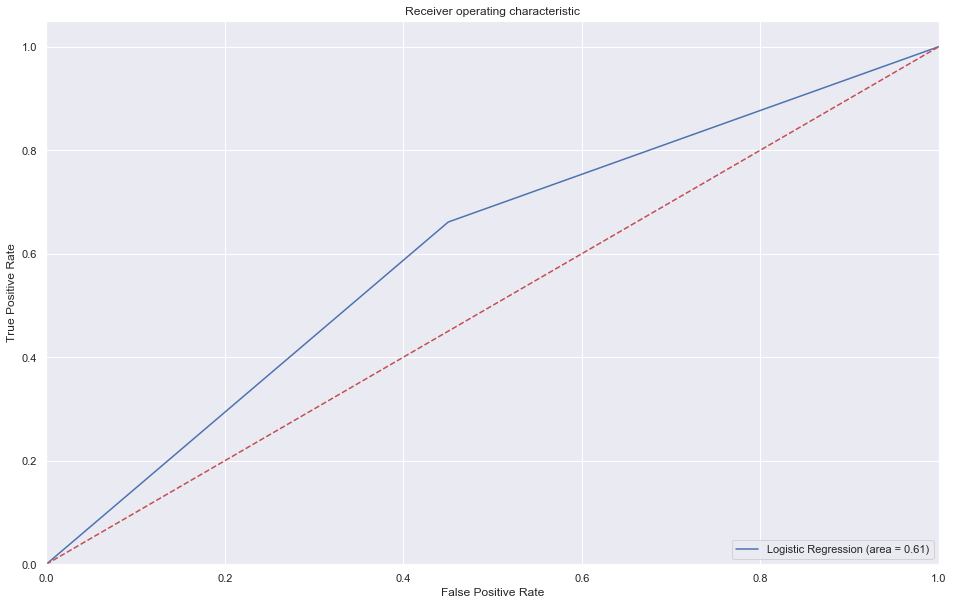

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(yPred, yTest))
print(f1_score(yPred,yTest))
print(confusion_matrix(yTest,yPred))
logit_roc_auc = roc_auc_score(yTest, yPred)
fpr, tpr, thresholds = roc_curve(yTest, yPred)
plt.figure(figsize=(16, 10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# f1 score is 0.4 as well

# Chi-Square Test or Feature selection based on P-values. By this method we use the P value to select the most significant features. 

In [45]:
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

accs = []
score = []
Balanced_Acc = []
p_values=[]
F1 = []
for trainIndex, textIndex in skf.split(X, y):
    xTrain, xTest = X[trainIndex], X[textIndex]
    yTrain, yTest = y[trainIndex], y[textIndex]

    # create the chi2-test and select attributes
    model = LogisticRegression(solver="liblinear")
    chi = SelectKBest(score_func=chi2, k= 10 ) # 10 features
    chi_10 = chi.fit(xTrain, yTrain)
    
    xTrain = chi_10.transform(xTrain)
    xTest = chi_10.transform(xTest)
    
    score_1 = chi_10.scores_
    p_values_1=chi_10.pvalues_
    score.append(score_1)
    p_values.append(p_values_1)
    # create a base classifier used to evaluate a subset of attributes
   
    model.fit(xTrain, yTrain)
    accs.append(model.score(xTest, yTest))
    yPred = model.predict(xTest)
    Balanced_Acc.append(balanced_accuracy_score(yTest, yPred))
    F1.append(f1_score(yPred,yTest))
#     print("F1: ", f1_score(yPred,yTest))
#     print("Balanced Accuracy: ", balanced_accuracy_score(yTest, yPred))
# print(pd.DataFrame(votes))

print(np.mean(score, axis = 0))
#print(p_values)
#print(np.mean(p_values,axis=0))
#print(np.mean(p_values,axis=0))
#print((np.mean(p_values,axis=0).sort_values(ascending=True))
p_values_ordered=pd.Series(np.mean(p_values,axis=0),index=None)
p_values_ordered_byName=pd.Series(np.mean(p_values,axis=0),index=df_feature.columns)
print(p_values_ordered.sort_values(ascending=True))
print(p_values_ordered_byName.sort_values(ascending=True))
print("model Score: ", np.mean(accs))
print("Balanced Accuracy: ", np.mean(Balanced_Acc))
print("F1: ", np.mean(F1))

[1.89024321e+01 9.72114208e+02 1.71371927e+01 1.48151045e+02
 7.63501855e+01 2.64689918e+03            nan 5.90367647e+00
 2.77149784e+00 1.13982983e+02 4.40346732e+00 1.83055161e+01
 3.39921372e+00 2.13967305e+00 5.33421796e+00 9.21477682e+00
 1.04323299e+02 5.19956480e+01]
5      0.000000e+00
1     1.301722e-208
9      2.099405e-25
3      1.235899e-24
16     5.230979e-24
4      5.014363e-17
17     1.540485e-12
11     3.352071e-05
2      5.848846e-05
0      1.752994e-04
15     3.566089e-03
14     2.324323e-02
10     4.356990e-02
12     7.138298e-02
7      8.184429e-02
8      1.012237e-01
13     2.135805e-01
6               NaN
dtype: float64
FBI Code                       0.000000e+00
Description                   1.301722e-208
Location                       2.099405e-25
Domestic                       1.235899e-24
Police Districts               5.230979e-24
Beat                           5.014363e-17
Police Beats                   1.540485e-12
Zip Codes                      3.352071e-

# Based on the p value we can see that most of the variables except five variables are significant. The insignificant variables are 'Community' 'Areas','Updated On','Longitude','Census Tracts','Year'

In [46]:
# from sklearn.metrics import classification_report
# print(classification_report(yPred, yTest))
# print(np.mean(balanced_accuracy_score(yTest, yPred)))
# print(yPred)

# Recursive Feature Elimination (RFE)  method to select features

In [47]:
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False) # n_splits=5= number of sample

votes = []
accs = []
support = []
Balanced_Acc = []
F1 = []
for trainIndex, textIndex in skf.split(X, y):
    xTrain, xTest = X[trainIndex], X[textIndex]
    yTrain, yTest = y[trainIndex], y[textIndex]

    # create the RFE model and select 10 attributes
    model = LogisticRegression(solver="liblinear")
    rfe = RFE(model, 10) # 10 represent the number of features
    rfe = rfe.fit(xTrain, yTrain)
    
    xTrain = rfe.transform(xTrain)
    xTest = rfe.transform(xTest)
    
    # summarize the selection of the attributes
#     print(rfe.support_)
#     print(rfe.ranking_)
    votes.append(rfe.ranking_)
    support.append(rfe.support_)
    
    # create a base classifier used to evaluate a subset of attributes
   
    model.fit(xTrain, yTrain)
    accs.append(model.score(xTest, yTest))
    yPred = model.predict(xTest)
    Balanced_Acc.append(balanced_accuracy_score(yTest, yPred))
    F1.append(f1_score(yPred,yTest))
    
    #selected_features_ranking=pd.DataFrame({'Feature' :list(df_feature.columns),'Ranking' :rfe.ranking_})
    #print(selected_features_ranking.sort_values(by='Ranking'))
    #selected_features_ranking=pd.DataFrame({'Feature' :list(df_feature.columns),'Ranking' :pd.Series(np.mean(votes,axis=0))})
    #print(selected_features_ranking.sort_values(by='Ranking'))
#     print("F1: ", f1_score(yPred,yTest))
#     print("Balanced Accuracy: ", balanced_accuracy_score(yTest, yPred))
# print(pd.DataFrame(votes))
 
#print(pd.DataFrame(votes).mean(axis=0))
ranking=pd.Series(np.mean(votes,axis=0))
selected_features_ranking=pd.DataFrame({'Feature' :list(df_feature.columns),'Ranking' :ranking})
print(selected_features_ranking.sort_values(by='Ranking'))
print("model Score: ", np.mean(accs))
print("Balanced Accuracy: ", np.mean(Balanced_Acc))
print("F1: ", np.mean(F1))

                       Feature  Ranking
0                 Primary Type      1.0
11                   Zip Codes      1.0
9                     Location      1.0
16            Police Districts      1.0
5                     FBI Code      1.0
8                    Longitude      1.0
3                     Domestic      1.0
1                  Description      1.0
14                       Wards      1.6
12             Community Areas      2.0
10  Historical Wards 2003-2015      2.2
15      Boundaries - ZIP Codes      2.4
7                   Updated On      3.6
2         Location Description      5.4
4                         Beat      6.2
13               Census Tracts      6.6
17                Police Beats      7.0
6                         Year      9.0
model Score:  0.7944596325638023
Balanced Accuracy:  0.5309735981755166
F1:  0.1516931751464075


# We also used Recursive Feature Elimination (RFE) method to select features.  This method shows that the among the five insignificant variables that we got from the chi-square test 'Longitude' variables shows singnificant to explain the target variable as it rank 1. Other four variable can be considered as insignificant